In [62]:
import pandas as pd


In [63]:
cuisine_train_dataframe = pd.read_json('../35000.json')
"""lets look into the head of the json"""

train.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


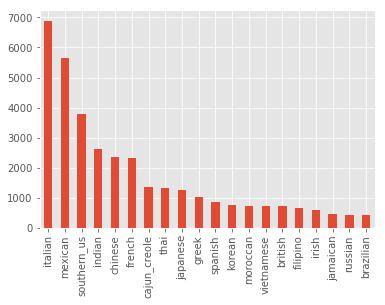

In [64]:
"This helps us to plot the graph and look into which cuisine is the higher number of occurences"

%matplotlib inline
import matplotlib.pyplot as plot
plot.style.use('ggplot')
train['cuisine'].value_counts().plot(kind='bar')


In [65]:
"""Using python counter object to find the number most frequent occurence of ingredients"""
from collections import Counter

In [66]:
counters = {}
for cuisine in df_train['cuisine'].unique():
    counters[cuisine] = Counter()
    indices = (df_train['cuisine'] == cuisine)
    for ingredients in df_train[indices]['ingredients']:
        counters[cuisine].update(ingredients)

In [67]:
counters['italian'].most_common(10)

[('salt', 3042),
 ('olive oil', 2746),
 ('grated parmesan cheese', 1410),
 ('garlic cloves', 1406),
 ('garlic', 1304),
 ('ground black pepper', 1260),
 ('extra-virgin olive oil', 1185),
 ('onions', 1111),
 ('water', 924),
 ('butter', 914)]

In [68]:
"""From above we see salt is the most frequent ingredient used in every cuisine"""
"""Moving these frequent top 10 ingredient into table format"""

top10 = pd.DataFrame([[items[0] for items in counters[cuisine].most_common(10)] for cuisine in counters],
            index=[cuisine for cuisine in counters],
            columns=['top{}'.format(i) for i in range(1, 11)])
top10

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
greek,salt,olive oil,dried oregano,garlic cloves,feta cheese crumbles,extra-virgin olive oil,ground black pepper,fresh lemon juice,garlic,pepper
southern_us,salt,butter,all-purpose flour,sugar,large eggs,baking powder,water,unsalted butter,buttermilk,milk
filipino,salt,garlic,onions,water,soy sauce,pepper,oil,sugar,carrots,ground black pepper
indian,salt,onions,garam masala,water,ground turmeric,garlic,cumin seed,ground cumin,vegetable oil,oil
jamaican,salt,onions,water,garlic,ground allspice,pepper,scallions,dried thyme,black pepper,garlic cloves
spanish,salt,olive oil,garlic cloves,extra-virgin olive oil,onions,ground black pepper,water,tomatoes,red bell pepper,garlic
italian,salt,olive oil,grated parmesan cheese,garlic cloves,garlic,ground black pepper,extra-virgin olive oil,onions,water,butter
chinese,soy sauce,sesame oil,corn starch,salt,sugar,garlic,water,green onions,vegetable oil,scallions
mexican,salt,onions,ground cumin,garlic,olive oil,chili powder,jalapeno chilies,sour cream,avocado,corn tortillas
british,salt,all-purpose flour,butter,milk,unsalted butter,eggs,sugar,onions,baking powder,large eggs


In [69]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from numpy import array
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


In [ ]:
feature_cols = ['ingredients']

X = cuisine_train_dataframe[feature_cols]

# convert array of strings for each json object to array of 1's and zeros by finding the number of unique ingredients 
#in all arrays 
# and creating that many columns and looping through all strings in the arrays and finding their index and setting it to 1

keys = set()

for ing_list in X['ingredients']:
    for ing in ing_list:
        keys.add(ing)
        
# create list of same size as X of lists of zeros of size n where n = the number of unique keys         
encoded = np.zeros(len(X) * len(keys)).reshape((len(X), len(keys)))

key_list = list(keys)

my_index = 0

for l in X['ingredients']:
    for item in l:
        index = key_list.index(item)
        encoded[my_index][index] = 1
    my_index += 1
    
X = np.array(encoded)

print("the first json object has total ingredients: ")
np.count_nonzero(X[0] == 1)
# 9 columns are set to 1 

In [71]:
# label vector
y = cuisine_train_dataframe['cuisine'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.06, random_state=1)

In [72]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_predict_gnb = gnb.predict(X_test)
accuracy_gnb = accuracy_score(y_test, y_predict_gnb)

print("\n\nAccuracy Naive Bayes: ", accuracy_gnb, "\n") 



Accuracy Naive Bayes:  0.360952380952 



In [73]:
# Applying 10-fold cross validation with "logistic regression" classifier:

# In the following line, "my_logreg" is instantiated as an "object" of LogisticRegression "class". 
my_logreg = LogisticRegression()

accuracy_list = cross_val_score(my_logreg, X, y, cv=10, scoring='accuracy')

print(accuracy_list)

[ 0.77521368  0.77765108  0.78921848  0.78504139  0.78428571  0.7787307
  0.76522734  0.78432494  0.7714122   0.78888571]


In [74]:
# use average of accuracy values as final result
accuracy_cv = accuracy_list.mean()

print(accuracy_cv)

0.779999124111
